In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=30bf2fe27ff892997db32b4c7cc74ab3


In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | lagoa
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | cayenne
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | paragould
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | broome
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | ossora
Processing Record 20 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set 1 | sentya

Processing Record 38 of Set 4 | ust-tsilma
Processing Record 39 of Set 4 | te anau
Processing Record 40 of Set 4 | leh
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | kontagora
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | urumqi
Processing Record 50 of Set 4 | aklavik
Processing Record 1 of Set 5 | lipari
Processing Record 2 of Set 5 | kirakira
Processing Record 3 of Set 5 | timmins
Processing Record 4 of Set 5 | lufilufi
Processing Record 5 of Set 5 | kieta
Processing Record 6 of Set 5 | shellbrook
Processing Record 7 of Set 5 | dicabisagan
Processing Record 8 of Set 5 | newport
Processing Record 9 of Set 5 | los llanos de aridane
Processing Record 10 of Set 5 | meulaboh
Processing Record 11 of Set 5 | kosino
P

Processing Record 27 of Set 8 | rio gallegos
Processing Record 28 of Set 8 | aguadilla
Processing Record 29 of Set 8 | belyy yar
Processing Record 30 of Set 8 | cravo norte
Processing Record 31 of Set 8 | muromtsevo
Processing Record 32 of Set 8 | kavali
Processing Record 33 of Set 8 | norman wells
Processing Record 34 of Set 8 | srednekolymsk
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | souillac
Processing Record 37 of Set 8 | saint-pierre
Processing Record 38 of Set 8 | haverfordwest
Processing Record 39 of Set 8 | pontian kecil
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | pontiac
Processing Record 42 of Set 8 | amuntai
Processing Record 43 of Set 8 | aranos
Processing Record 44 of Set 8 | tungkang
City not found. Skipping...
Processing Record 45 of Set 8 | along
Processing Record 46 of Set 8 | bulungu
Processing Record 47 of Set 8 | odweyne
Processing Record 48 of Set 8 | chapais
Processing Record 49 of Set 8 | dunda
Proce

Processing Record 14 of Set 12 | olonets
Processing Record 15 of Set 12 | gizo
Processing Record 16 of Set 12 | maldonado
Processing Record 17 of Set 12 | san andres
Processing Record 18 of Set 12 | trat
Processing Record 19 of Set 12 | moose factory
Processing Record 20 of Set 12 | pauini
Processing Record 21 of Set 12 | jozefow
Processing Record 22 of Set 12 | luebo
Processing Record 23 of Set 12 | pokhara
Processing Record 24 of Set 12 | ende
Processing Record 25 of Set 12 | puerto quijarro
Processing Record 26 of Set 12 | liverpool
Processing Record 27 of Set 12 | taunton
Processing Record 28 of Set 12 | mityana
Processing Record 29 of Set 12 | bac lieu
Processing Record 30 of Set 12 | qui nhon
Processing Record 31 of Set 12 | dauphin
Processing Record 32 of Set 12 | camflora
City not found. Skipping...
Processing Record 33 of Set 12 | balvi
Processing Record 34 of Set 12 | keelung
Processing Record 35 of Set 12 | port hardy
Processing Record 36 of Set 12 | linshu
City not found. S

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,80.15,84,74,5.77,RE,2022-01-20 17:52:07
1,Lagoa,39.0500,-27.9833,61.68,85,80,19.51,PT,2022-01-20 17:52:07
2,Kavieng,-2.5744,150.7967,79.99,79,100,11.14,PG,2022-01-20 17:52:08
3,Rikitea,-23.1203,-134.9692,78.44,75,100,9.55,PF,2022-01-20 17:52:08
4,Ushuaia,-54.8000,-68.3000,67.62,33,1,4.43,AR,2022-01-20 17:48:32
5,Bluff,-46.6000,168.3333,54.81,74,100,17.11,NZ,2022-01-20 17:52:09
6,Victoria,22.2855,114.1577,64.38,84,84,1.99,HK,2022-01-20 17:48:33
7,Avarua,-21.2078,-159.7750,80.65,89,75,10.36,CK,2022-01-20 17:52:10
8,Cayenne,4.9333,-52.3333,84.24,82,75,4.00,GF,2022-01-20 17:52:10
9,Constitucion,-35.3333,-72.4167,66.34,50,0,13.51,CL,2022-01-20 17:52:10


In [20]:
#rearrange columns
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-01-20 17:52:07,-21.3585,55.7679,80.15,84,74,5.77
1,Lagoa,PT,2022-01-20 17:52:07,39.0500,-27.9833,61.68,85,80,19.51
2,Kavieng,PG,2022-01-20 17:52:08,-2.5744,150.7967,79.99,79,100,11.14
3,Rikitea,PF,2022-01-20 17:52:08,-23.1203,-134.9692,78.44,75,100,9.55
4,Ushuaia,AR,2022-01-20 17:48:32,-54.8000,-68.3000,67.62,33,1,4.43
5,Bluff,NZ,2022-01-20 17:52:09,-46.6000,168.3333,54.81,74,100,17.11
6,Victoria,HK,2022-01-20 17:48:33,22.2855,114.1577,64.38,84,84,1.99
7,Avarua,CK,2022-01-20 17:52:10,-21.2078,-159.7750,80.65,89,75,10.36
8,Cayenne,GF,2022-01-20 17:52:10,4.9333,-52.3333,84.24,82,75,4.00
9,Constitucion,CL,2022-01-20 17:52:10,-35.3333,-72.4167,66.34,50,0,13.51


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

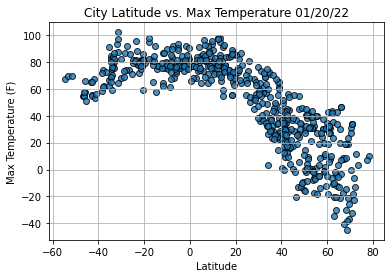

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

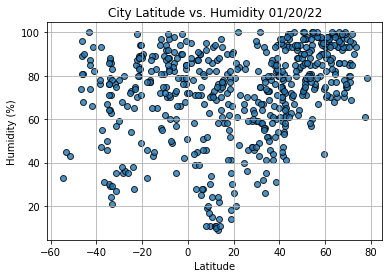

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

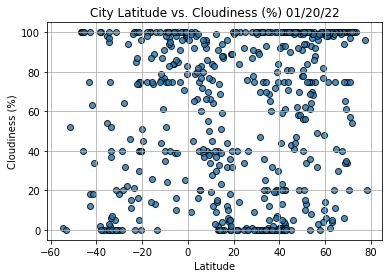

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

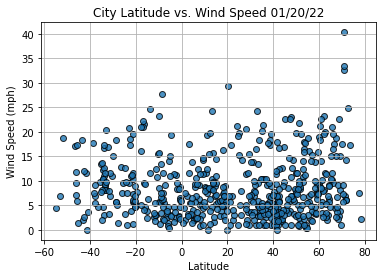

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()